In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

In [ ]:
sp500_tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'BRK.B', 'V', 'JPM', 'UNH', 'HD', 'PYPL', 'DIS', 'MA', 'PG',
    'VZ', 'NFLX', 'INTC', 'KO', 'PEP', 'BA', 'XOM', 'CVX', 'CSCO', 'WMT', 'T', 'MCD', 'ORCL', 'CAT', 'MRK', 'COST',
    'GE', 'BABA', 'ABBV', 'ADBE', 'AXP', 'CRM', 'AMGN', 'INTU', 'AMT', 'NKE', 'GS', 'WBA', 'SBUX', 'CSX', 'LMT', 'MDT', 'GS',
    'SPGI', 'BIIB', 'LUV', 'UNP', 'ISRG', 'CI', 'CVS', 'TMO', 'HON', 'LRCX', 'SHW', 'RTX', 'MMM', 'BKNG', 'ITW', 'FISV', 'MU',
    'QCOM', 'CHTR', 'STZ', 'TSCO', 'F', 'DE', 'NEE', 'MS', 'ZTS', 'WFC', 'PLD', 'AON', 'BMY', 'MMC', 'FIS', 'KHC', 'SLB', 'APD',
    'MDLZ', 'CHD', 'HUM', 'AIG', 'EL', 'SYK', 'HCA', 'DUK', 'ALL', 'C', 'OXY', 'HPE', 'SPG', 'SYY', 'VLO', 'ES', 'VMC', 'FTNT',
    'DHR', 'EOG', 'IT', 'AFL', 'NOC', 'COP', 'GILD', 'VRTX', 'WDC', 'MSCI', 'ADP', 'EXC', 'FANG', 'ZBH', 'CTSH', 'NEM', 'LHX',
    'DOW', 'BKR', 'APTV', 'TDG', 'CHKP', 'KMB', 'IQV', 'PFE', 'MU', 'BIIB', 'RMD', 'WEC', 'VFC', 'CME', 'LULU', 'MCK', 'ROST',
    'DG', 'O', 'TGT', 'SWKS', 'TROW', 'PKI', 'AEP', 'PEP', 'STT', 'MCO', 'AIZ', 'DHI', 'CTAS', 'SPGI', 'ADSK', 'FSLR', 'HIG',
    'CSX', 'NUE', 'TMUS', 'FTV', 'EXPD', 'BAX', 'MTD', 'SWK', 'ETN', 'MMC', 'FCX', 'KSU', 'PSX', 'WMT', 'RSG', 'LNC', 'PLUG',
    'TWTR', 'SQ', 'GOOG', 'MELI', 'DOCU', 'SPOT', 'BIDU', 'UBER', 'LYFT', 'PINS', 'SNAP', 'SQ', 'FSLR', 'SPLK', 'NVDA', 'PYPL',
    'RNG', 'VEEV', 'ZS', 'ZM', 'DOCU', 'MDB', 'PINS', 'COST', 'NTES', 'ROKU', 'INTC', 'COST', 'MRNA', 'VEEV', 'SHOP', 'FVRR',
    'WBA', 'NKE', 'TMO', 'IDXX', 'SWKS', 'MCD', 'AEP', 'AMT', 'EXC', 'KLAC', 'AON', 'VRTX', 'LULU', 'ZBH', 'HCA', 'FISV',
    'TGT', 'MU', 'AMT', 'UNP', 'CME', 'VFC', 'SYY', 'SYK', 'CVS', 'SBUX', 'PFE', 'TROW', 'NEE', 'SPLK', 'FIS', 'FANG', 'PNC',
    'TXN', 'CSCO', 'TMO', 'PGR', 'AMGN', 'SHOP', 'V', 'KMB', 'ROST', 'DXC', 'TAP', 'IDXX', 'BAX', 'LMT', 'RMD', 'ITW', 'RSG',
    'REGN', 'COST', 'LMT', 'DHR', 'JPM', 'C', 'LUV', 'HUM', 'APD', 'MS', 'HCA', 'WDC', 'ABT', 'COST', 'AMZN', 'MA', 'MSFT', 'VZ',
    'PFE', 'WMT', 'BMY', 'ZTS', 'GD', 'WFC', 'CHTR', 'GILD', 'FIS', 'ZBH', 'BIIB', 'LOW', 'NEE', 'VEEV', 'SWK', 'BA', 'MSCI',
    'AVGO', 'GS', 'MU', 'UNH', 'DE', 'KHC', 'EXC', 'XOM', 'PYPL', 'LHX', 'LULU', 'CVS', 'GE', 'DOW', 'BABA', 'MDT', 'AAPL',
    'HCA', 'BA', 'BAX', 'SBUX', 'NOC', 'LLY', 'ROKU', 'CHKP', 'SNAP', 'WEC', 'EL', 'COF', 'WMT', 'ZBH', 'PEP', 'EXPD', 'PLD',
    'SPGI', 'MRNA', 'AMGN', 'HD', 'INTC', 'BIIB', 'ORCL', 'PG', 'CME', 'FCX', 'ALGN', 'MMM', 'V', 'BMY', 'STZ', 'DHR', 'VMC',
    'COP', 'NTES', 'RTX', 'KO', 'GE', 'JNJ', 'AVGO', 'NSC', 'EOG', 'GPN', 'ADP', 'SYY', 'NEE', 'COST', 'SPGI', 'RSG', 'DLR',
    'BKR', 'SPLK', 'PLD', 'VFC', 'TMO', 'LMT', 'EOG', 'CVS', 'NEM', 'MRK', 'AMGN', 'GOOG', 'CAT', 'AIG', 'CVX', 'CVS', 'AIG',
    'TROW', 'CSX', 'MMC', 'RMD', 'HON', 'ZTS', 'AXP', 'T', 'ADSK', 'FTV', 'LHX', 'MSCI', 'PFE', 'DXC', 'LULU', 'PG', 'AMT',
    'BAX', 'CSCO', 'HCA', 'DIS', 'VZ', 'IQV', 'EXC', 'AXP', 'REGN', 'CTAS', 'WEC', 'FISV', 'UNP', 'PEP', 'VLO', 'NKE', 'TRV',
    'GE', 'NUE', 'NEE', 'INTC', 'ALXN', 'AON', 'IDXX', 'AAPL', 'WMT', 'TMO', 'MDT', 'HON', 'XOM', 'LMT', 'SBUX', 'MMM', 'KMB',
    'APD', 'WDC', 'MSCI', 'ZTS', 'KHC', 'GS', 'AIG', 'BMY', 'PYPL', 'WFC', 'LUV', 'PG', 'AMGN', 'ZBH', 'NVDA', 'TGT', 'CRM'
]

In [ ]:
# data = yf.download(sp500_tickers, start='2000-01-01', end='2025-04-01', auto_adjust=True)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_2000_20250401_yfinance.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
df_sp500_price = data['Close'].dropna(axis=1).dropna()

In [ ]:
df_sp500_return = data['Close'].dropna(axis=1).dropna().pct_change().dropna()

In [ ]:
df_sp500_tmp_close = data['Close']
df_sp500_tmp_volume = data['Volume']

In [ ]:
df_sp500_tradingval_tmp = df_sp500_tmp_close * df_sp500_tmp_volume
df_sp500_tradingval = df_sp500_tradingval_tmp.dropna(axis=1).dropna()

In [ ]:
layers = [df_sp500_price.head(10), df_sp500_return.head(10), df_sp500_tradingval.head(10)]

# `granger_causality_all_pairs()`
Granger test has been written for find relation between securities (nodes) in each layer.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd

def granger_causality_all_pairs(df, max_lag=[1], num_threads=8):
    cols = df.columns
    num_columns = len(cols)
    p_values = np.zeros((num_columns, num_columns))

    # Function to process each pair of columns
    def process_pair(i, j):
        try:
            result = grangercausalitytests(df[[df.columns[i], df.columns[j]]], max_lag, verbose=False)
            return (i, j, result[1][0]['ssr_chi2test'][1])  # Return the pair and p-value
        except Exception as e:
            print(f" ======================== Exception ======================== ")
            print(f"Failed pair: {i}, {j}")
            print(f"Data:\n{df[[df.columns[i], df.columns[j]]].head()}")
            print(f"Error: {e}")
            return (i, j, None)  # Return None for failed pair

    # Create a list of tasks (i, j) pairs to process in parallel
    tasks = [(i, j) for i in range(num_columns) for j in range(num_columns) if i != j]

    # Use joblib to parallelize the processing of pairs
    results = Parallel(n_jobs=num_threads)(delayed(process_pair)(i, j) for i, j in tqdm(tasks, desc="Processing Pairs", total=len(tasks)))

    # Store the results in the p_values matrix
    for i, j, p_value in results:
        if p_value is not None:
            p_values[i, j] = p_value

    # Convert the p_values matrix into a DataFrame with proper column names
    p_values_df = pd.DataFrame(p_values, columns=cols, index=cols)

    return p_values_df


**Sliding window is incrementing with 30 days steps and 100 days as window length**

This part implements a sliding window technique on time-series data, where the window slides forward in increments of 30 days. Each window represents a 100-day span, allowing for efficient processing and analysis of data in overlapping segments.

In [ ]:
import time

def rolling_window_on_data(df):
  for unit in np.arange(step=30,stop=len(df)):
    window = df.iloc[unit:unit+100]
    maxx = window.index.max()

    # Cut boundry before loss data in length of window
    if maxx == np.datetime64('2025-03-31 00:00:00'): break
    yield window

In [9]:
# import pickle

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer3/layer3_tradingval_205_times_evolution.pkl', 'rb') as file:
#     temp3001 = pickle.load(file)

# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer3/layer3_tradingval_206_209.pkl', 'rb') as file:
#     temp3002 = pickle.load(file)

# temp = temp3002

# len(temp3002)

209

In [7]:
temp[200]

Ticker,AAPL,ABT,ADBE,ADP,ADSK,AEP,AFL,AIG,ALL,AMGN,...,VLO,VMC,VRTX,VZ,WBA,WDC,WEC,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.439025,0.174036,0.511560,0.120193,0.025238,0.067473,0.113563,0.985333,0.639294,...,0.154842,0.177224,0.589467,0.613558,0.671400,0.911432,0.450635,0.000268,0.132140,0.873990
ABT,0.848448,0.000000,0.000258,0.658293,0.910420,0.940103,0.637965,0.523505,0.737103,0.969059,...,0.154864,0.012001,0.580924,0.856544,0.315492,0.554373,0.649948,0.010524,0.440079,0.458206
ADBE,0.724849,0.055331,0.000000,0.001502,0.346052,0.614949,0.420747,0.383392,0.013896,0.034395,...,0.731146,0.761163,0.175828,0.073950,0.422310,0.388382,0.479068,0.000603,0.350415,0.909575
ADP,0.191206,0.364026,0.040367,0.000000,0.035868,0.177434,0.428906,0.404772,0.847949,0.557161,...,0.244351,0.097052,0.305360,0.622298,0.952990,0.312023,0.625724,0.001394,0.517605,0.161726
ADSK,0.828957,0.038890,0.422073,0.024354,0.000000,0.035356,0.823871,0.499881,0.051033,0.362193,...,0.351009,0.832404,0.069641,0.248324,0.601856,0.529964,0.620870,0.148644,0.355423,0.245323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.272080,0.418474,0.961322,0.734358,0.750438,0.341149,0.936078,0.643827,0.542680,0.888438,...,0.703295,0.782498,0.618914,0.673563,0.772894,0.000000,0.392022,0.127151,0.502499,0.453324
WEC,0.941761,0.600111,0.954855,0.969202,0.834749,0.594403,0.747000,0.660536,0.646611,0.944967,...,0.273647,0.672327,0.000215,0.394510,0.982604,0.463147,0.000000,0.573136,0.477037,0.618067
WFC,0.355600,0.017609,0.743363,0.027231,0.788533,0.696545,0.121805,0.067231,0.117680,0.023851,...,0.804956,0.652506,0.170776,0.119886,0.616476,0.843330,0.711325,0.000000,0.141026,0.092449


This part trying to calculate granger causality and save them with determined frequency in a folder in google drive.

In [ ]:
layer0_t_evolution = []

# for i,layer_0_t in enumerate(rolling_window_on_data(df_sp500_tradingval)):
#   if i>=0:
#     print(i,layer_0_t.index.min(), layer_0_t.index.max(), sep=',')
#     p_values_matrix = granger_causality_all_pairs(layer_0_t, max_lag=[1])
#     layer0_t_evolution.append(p_values_matrix)

#     print(f'step: {len(layer0_t_evolution)}')
#     print(f'elements: {len(layer0_t_evolution[len(layer0_t_evolution)-1])}')

#     if i%5 == 0:
#       with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer3/layer3_tradingval_{i}_times_evolution.pkl', 'wb') as f:
#         pickle.dump(layer0_t_evolution, f)

0,2000-01-03 00:00:00,2000-05-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:45<00:00, 183.59it/s]


step: 1
elements: 140
1,2000-02-15 00:00:00,2000-07-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.45it/s]


step: 2
elements: 140
2,2000-03-29 00:00:00,2000-08-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.77it/s]


step: 3
elements: 140
3,2000-05-11 00:00:00,2000-10-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.22it/s]


step: 4
elements: 140
4,2000-06-23 00:00:00,2000-11-13 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.13it/s]


step: 5
elements: 140
5,2000-08-07 00:00:00,2000-12-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.52it/s]


step: 6
elements: 140
6,2000-09-19 00:00:00,2001-02-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.14it/s]


step: 7
elements: 140
7,2000-10-31 00:00:00,2001-03-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 240.02it/s]


step: 8
elements: 140
8,2000-12-13 00:00:00,2001-05-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.77it/s]


step: 9
elements: 140
9,2001-01-29 00:00:00,2001-06-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.88it/s]


step: 10
elements: 140
10,2001-03-13 00:00:00,2001-08-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 236.89it/s]


step: 11
elements: 140
11,2001-04-25 00:00:00,2001-09-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.58it/s]


step: 12
elements: 140
12,2001-06-07 00:00:00,2001-11-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.69it/s]


step: 13
elements: 140
13,2001-07-20 00:00:00,2001-12-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 233.21it/s]


step: 14
elements: 140
14,2001-08-31 00:00:00,2002-01-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.25it/s]


step: 15
elements: 140
15,2001-10-19 00:00:00,2002-03-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 227.13it/s]


step: 16
elements: 140
16,2001-12-03 00:00:00,2002-04-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 234.68it/s]


step: 17
elements: 140
17,2002-01-16 00:00:00,2002-06-10 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.21it/s]


step: 18
elements: 140
18,2002-03-01 00:00:00,2002-07-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 231.28it/s]


step: 19
elements: 140
19,2002-04-15 00:00:00,2002-09-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:30<00:00, 215.88it/s]


step: 20
elements: 140
20,2002-05-28 00:00:00,2002-10-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 224.91it/s]


step: 21
elements: 140
21,2002-07-10 00:00:00,2002-11-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.49it/s]


step: 22
elements: 140
22,2002-08-21 00:00:00,2003-01-13 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 236.44it/s]


step: 23
elements: 140
23,2002-10-03 00:00:00,2003-02-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 226.95it/s]


step: 24
elements: 140
24,2002-11-14 00:00:00,2003-04-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 236.66it/s]


step: 25
elements: 140
25,2002-12-30 00:00:00,2003-05-22 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:31<00:00, 212.28it/s]


step: 26
elements: 140
26,2003-02-12 00:00:00,2003-07-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:36<00:00, 201.14it/s]


step: 27
elements: 140
27,2003-03-27 00:00:00,2003-08-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:28<00:00, 220.73it/s]


step: 28
elements: 140
28,2003-05-09 00:00:00,2003-09-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.92it/s]


step: 29
elements: 140
29,2003-06-23 00:00:00,2003-11-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.52it/s]


step: 30
elements: 140
30,2003-08-05 00:00:00,2003-12-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.95it/s]


step: 31
elements: 140
31,2003-09-17 00:00:00,2004-02-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 226.95it/s]


step: 32
elements: 140
32,2003-10-29 00:00:00,2004-03-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 234.80it/s]


step: 33
elements: 140
33,2003-12-11 00:00:00,2004-05-05 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.99it/s]


step: 34
elements: 140
34,2004-01-27 00:00:00,2004-06-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.83it/s]


step: 35
elements: 140
35,2004-03-10 00:00:00,2004-08-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:27<00:00, 221.88it/s]


step: 36
elements: 140
36,2004-04-22 00:00:00,2004-09-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:16<00:00, 253.25it/s]


step: 37
elements: 140
37,2004-06-04 00:00:00,2004-10-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 227.05it/s]


step: 38
elements: 140
38,2004-07-20 00:00:00,2004-12-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 237.13it/s]


step: 39
elements: 140
39,2004-08-31 00:00:00,2005-01-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.24it/s]


step: 40
elements: 140
40,2004-10-13 00:00:00,2005-03-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.56it/s]


step: 41
elements: 140
41,2004-11-24 00:00:00,2005-04-19 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 232.19it/s]


step: 42
elements: 140
42,2005-01-07 00:00:00,2005-06-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.37it/s]


step: 43
elements: 140
43,2005-02-22 00:00:00,2005-07-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.44it/s]


step: 44
elements: 140
44,2005-04-06 00:00:00,2005-08-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.65it/s]


step: 45
elements: 140
45,2005-05-18 00:00:00,2005-10-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 224.47it/s]


step: 46
elements: 140
46,2005-06-30 00:00:00,2005-11-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.32it/s]


step: 47
elements: 140
47,2005-08-12 00:00:00,2006-01-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.30it/s]


step: 48
elements: 140
48,2005-09-26 00:00:00,2006-02-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.39it/s]


step: 49
elements: 140
49,2005-11-07 00:00:00,2006-03-31 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.71it/s]


step: 50
elements: 140
50,2005-12-20 00:00:00,2006-05-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 226.11it/s]


step: 51
elements: 140
51,2006-02-03 00:00:00,2006-06-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.62it/s]


step: 52
elements: 140
52,2006-03-20 00:00:00,2006-08-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.06it/s]


step: 53
elements: 140
53,2006-05-02 00:00:00,2006-09-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 232.09it/s]


step: 54
elements: 140
54,2006-06-14 00:00:00,2006-11-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.50it/s]


step: 55
elements: 140
55,2006-07-27 00:00:00,2006-12-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.50it/s]


step: 56
elements: 140
56,2006-09-08 00:00:00,2007-02-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.94it/s]


step: 57
elements: 140
57,2006-10-20 00:00:00,2007-03-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:27<00:00, 221.18it/s]


step: 58
elements: 140
58,2006-12-04 00:00:00,2007-04-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 229.16it/s]


step: 59
elements: 140
59,2007-01-19 00:00:00,2007-06-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.69it/s]


step: 60
elements: 140
60,2007-03-05 00:00:00,2007-07-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:27<00:00, 222.27it/s]


step: 61
elements: 140
61,2007-04-17 00:00:00,2007-09-06 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 225.22it/s]


step: 62
elements: 140
62,2007-05-30 00:00:00,2007-10-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.44it/s]


step: 63
elements: 140
63,2007-07-12 00:00:00,2007-11-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:28<00:00, 220.22it/s]


step: 64
elements: 140
64,2007-08-23 00:00:00,2008-01-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 234.21it/s]


step: 65
elements: 140
65,2007-10-05 00:00:00,2008-02-28 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.29it/s]


step: 66
elements: 140
66,2007-11-16 00:00:00,2008-04-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 230.86it/s]


step: 67
elements: 140
67,2008-01-02 00:00:00,2008-05-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.09it/s]


step: 68
elements: 140
68,2008-02-14 00:00:00,2008-07-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.61it/s]


step: 69
elements: 140
69,2008-03-31 00:00:00,2008-08-19 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.60it/s]


step: 70
elements: 140
70,2008-05-12 00:00:00,2008-10-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.74it/s]


step: 71
elements: 140
71,2008-06-24 00:00:00,2008-11-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 236.03it/s]


step: 72
elements: 140
72,2008-08-06 00:00:00,2008-12-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 227.32it/s]


step: 73
elements: 140
73,2008-09-18 00:00:00,2009-02-10 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 249.53it/s]


step: 74
elements: 140
74,2008-10-30 00:00:00,2009-03-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.29it/s]


step: 75
elements: 140
75,2008-12-12 00:00:00,2009-05-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.19it/s]


step: 76
elements: 140
76,2009-01-28 00:00:00,2009-06-19 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 246.29it/s]


step: 77
elements: 140
77,2009-03-12 00:00:00,2009-08-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 234.44it/s]


step: 78
elements: 140
78,2009-04-24 00:00:00,2009-09-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 230.65it/s]


step: 79
elements: 140
79,2009-06-08 00:00:00,2009-10-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.07it/s]


step: 80
elements: 140
80,2009-07-21 00:00:00,2009-12-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 249.38it/s]


step: 81
elements: 140
81,2009-09-01 00:00:00,2010-01-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.77it/s]


step: 82
elements: 140
82,2009-10-14 00:00:00,2010-03-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.30it/s]


step: 83
elements: 140
83,2009-11-25 00:00:00,2010-04-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.88it/s]


step: 84
elements: 140
84,2010-01-11 00:00:00,2010-06-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.93it/s]


step: 85
elements: 140
85,2010-02-24 00:00:00,2010-07-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.33it/s]


step: 86
elements: 140
86,2010-04-08 00:00:00,2010-08-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 249.52it/s]


step: 87
elements: 140
87,2010-05-20 00:00:00,2010-10-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.78it/s]


step: 88
elements: 140
88,2010-07-02 00:00:00,2010-11-22 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.69it/s]


step: 89
elements: 140
89,2010-08-16 00:00:00,2011-01-05 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.87it/s]


step: 90
elements: 140
90,2010-09-28 00:00:00,2011-02-17 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.73it/s]


step: 91
elements: 140
91,2010-11-09 00:00:00,2011-04-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.32it/s]


step: 92
elements: 140
92,2010-12-22 00:00:00,2011-05-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.86it/s]


step: 93
elements: 140
93,2011-02-04 00:00:00,2011-06-28 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.63it/s]


step: 94
elements: 140
94,2011-03-21 00:00:00,2011-08-10 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.48it/s]


step: 95
elements: 140
95,2011-05-03 00:00:00,2011-09-22 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:16<00:00, 255.13it/s]


step: 96
elements: 140
96,2011-06-15 00:00:00,2011-11-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.74it/s]


step: 97
elements: 140
97,2011-07-28 00:00:00,2011-12-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.35it/s]


step: 98
elements: 140
98,2011-09-09 00:00:00,2012-02-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 249.11it/s]


step: 99
elements: 140
99,2011-10-21 00:00:00,2012-03-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.85it/s]


step: 100
elements: 140
100,2011-12-05 00:00:00,2012-04-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 240.81it/s]


step: 101
elements: 140
101,2012-01-19 00:00:00,2012-06-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.31it/s]


step: 102
elements: 140
102,2012-03-02 00:00:00,2012-07-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.35it/s]


step: 103
elements: 140
103,2012-04-16 00:00:00,2012-09-05 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 227.58it/s]


step: 104
elements: 140
104,2012-05-29 00:00:00,2012-10-17 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.36it/s]


step: 105
elements: 140
105,2012-07-11 00:00:00,2012-12-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.90it/s]


step: 106
elements: 140
106,2012-08-22 00:00:00,2013-01-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 234.27it/s]


step: 107
elements: 140
107,2012-10-04 00:00:00,2013-03-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.72it/s]


step: 108
elements: 140
108,2012-11-19 00:00:00,2013-04-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.75it/s]


step: 109
elements: 140
109,2013-01-03 00:00:00,2013-05-28 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 236.54it/s]


step: 110
elements: 140
110,2013-02-15 00:00:00,2013-07-10 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 233.61it/s]


step: 111
elements: 140
111,2013-04-02 00:00:00,2013-08-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.90it/s]


step: 112
elements: 140
112,2013-05-14 00:00:00,2013-10-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 240.20it/s]


step: 113
elements: 140
113,2013-06-26 00:00:00,2013-11-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 229.12it/s]


step: 114
elements: 140
114,2013-08-08 00:00:00,2013-12-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.63it/s]


step: 115
elements: 140
115,2013-09-20 00:00:00,2014-02-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 228.23it/s]


step: 116
elements: 140
116,2013-11-01 00:00:00,2014-03-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.94it/s]


step: 117
elements: 140
117,2013-12-16 00:00:00,2014-05-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.24it/s]


step: 118
elements: 140
118,2014-01-30 00:00:00,2014-06-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 226.77it/s]


step: 119
elements: 140
119,2014-03-14 00:00:00,2014-08-05 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.33it/s]


step: 120
elements: 140
120,2014-04-28 00:00:00,2014-09-17 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.71it/s]


step: 121
elements: 140
121,2014-06-10 00:00:00,2014-10-29 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:28<00:00, 220.42it/s]


step: 122
elements: 140
122,2014-07-23 00:00:00,2014-12-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.58it/s]


step: 123
elements: 140
123,2014-09-04 00:00:00,2015-01-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 228.36it/s]


step: 124
elements: 140
124,2014-10-16 00:00:00,2015-03-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.87it/s]


step: 125
elements: 140
125,2014-11-28 00:00:00,2015-04-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:22<00:00, 235.80it/s]


step: 126
elements: 140
126,2015-01-13 00:00:00,2015-06-05 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.88it/s]


step: 127
elements: 140
127,2015-02-26 00:00:00,2015-07-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.05it/s]


step: 128
elements: 140
128,2015-04-10 00:00:00,2015-08-31 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 240.23it/s]


step: 129
elements: 140
129,2015-05-22 00:00:00,2015-10-13 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.20it/s]


step: 130
elements: 140
130,2015-07-07 00:00:00,2015-11-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.21it/s]


step: 131
elements: 140
131,2015-08-18 00:00:00,2016-01-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.73it/s]


step: 132
elements: 140
132,2015-09-30 00:00:00,2016-02-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 240.06it/s]


step: 133
elements: 140
133,2015-11-11 00:00:00,2016-04-06 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 246.16it/s]


step: 134
elements: 140
134,2015-12-24 00:00:00,2016-05-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.70it/s]


step: 135
elements: 140
135,2016-02-09 00:00:00,2016-06-30 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 240.96it/s]


step: 136
elements: 140
136,2016-03-23 00:00:00,2016-08-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:27<00:00, 222.29it/s]


step: 137
elements: 140
137,2016-05-05 00:00:00,2016-09-26 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.88it/s]


step: 138
elements: 140
138,2016-06-17 00:00:00,2016-11-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.92it/s]


step: 139
elements: 140
139,2016-08-01 00:00:00,2016-12-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 246.00it/s]


step: 140
elements: 140
140,2016-09-13 00:00:00,2017-02-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.72it/s]


step: 141
elements: 140
141,2016-10-25 00:00:00,2017-03-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.67it/s]


step: 142
elements: 140
142,2016-12-07 00:00:00,2017-05-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.54it/s]


step: 143
elements: 140
143,2017-01-23 00:00:00,2017-06-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 243.18it/s]


step: 144
elements: 140
144,2017-03-07 00:00:00,2017-07-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 246.06it/s]


step: 145
elements: 140
145,2017-04-19 00:00:00,2017-09-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.51it/s]


step: 146
elements: 140
146,2017-06-01 00:00:00,2017-10-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.27it/s]


step: 147
elements: 140
147,2017-07-14 00:00:00,2017-12-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.78it/s]


step: 148
elements: 140
148,2017-08-25 00:00:00,2018-01-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.09it/s]


step: 149
elements: 140
149,2017-10-09 00:00:00,2018-03-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.48it/s]


step: 150
elements: 140
150,2017-11-20 00:00:00,2018-04-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:16<00:00, 252.91it/s]


step: 151
elements: 140
151,2018-01-04 00:00:00,2018-05-29 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.24it/s]


step: 152
elements: 140
152,2018-02-16 00:00:00,2018-07-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.41it/s]


step: 153
elements: 140
153,2018-04-03 00:00:00,2018-08-22 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 227.91it/s]


step: 154
elements: 140
154,2018-05-15 00:00:00,2018-10-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 246.06it/s]


step: 155
elements: 140
155,2018-06-27 00:00:00,2018-11-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.91it/s]


step: 156
elements: 140
156,2018-08-09 00:00:00,2019-01-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.48it/s]


step: 157
elements: 140
157,2018-09-21 00:00:00,2019-02-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:16<00:00, 253.44it/s]


step: 158
elements: 140
158,2018-11-02 00:00:00,2019-03-29 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.85it/s]


step: 159
elements: 140
159,2018-12-18 00:00:00,2019-05-13 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 243.27it/s]


step: 160
elements: 140
160,2019-02-01 00:00:00,2019-06-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.69it/s]


step: 161
elements: 140
161,2019-03-18 00:00:00,2019-08-07 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.84it/s]


step: 162
elements: 140
162,2019-04-30 00:00:00,2019-09-19 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.76it/s]


step: 163
elements: 140
163,2019-06-12 00:00:00,2019-10-31 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 225.96it/s]


step: 164
elements: 140
164,2019-07-25 00:00:00,2019-12-13 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.31it/s]


step: 165
elements: 140
165,2019-09-06 00:00:00,2020-01-29 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:26<00:00, 225.10it/s]


step: 166
elements: 140
166,2019-10-18 00:00:00,2020-03-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 232.81it/s]


step: 167
elements: 140
167,2019-12-02 00:00:00,2020-04-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.87it/s]


step: 168
elements: 140
168,2020-01-15 00:00:00,2020-06-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 249.09it/s]


step: 169
elements: 140
169,2020-02-28 00:00:00,2020-07-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 240.32it/s]


step: 170
elements: 140
170,2020-04-13 00:00:00,2020-09-01 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.23it/s]


step: 171
elements: 140
171,2020-05-26 00:00:00,2020-10-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.31it/s]


step: 172
elements: 140
172,2020-07-08 00:00:00,2020-11-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.06it/s]


step: 173
elements: 140
173,2020-08-19 00:00:00,2021-01-11 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.82it/s]


step: 174
elements: 140
174,2020-10-01 00:00:00,2021-02-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.64it/s]


step: 175
elements: 140
175,2020-11-12 00:00:00,2021-04-08 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 243.00it/s]


step: 176
elements: 140
176,2020-12-28 00:00:00,2021-05-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 241.30it/s]


step: 177
elements: 140
177,2021-02-10 00:00:00,2021-07-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.48it/s]


step: 178
elements: 140
178,2021-03-25 00:00:00,2021-08-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.85it/s]


step: 179
elements: 140
179,2021-05-07 00:00:00,2021-09-28 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 249.01it/s]


step: 180
elements: 140
180,2021-06-21 00:00:00,2021-11-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:16<00:00, 255.62it/s]


step: 181
elements: 140
181,2021-08-03 00:00:00,2021-12-22 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.97it/s]


step: 182
elements: 140
182,2021-09-15 00:00:00,2022-02-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.63it/s]


step: 183
elements: 140
183,2021-10-27 00:00:00,2022-03-21 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 246.67it/s]


step: 184
elements: 140
184,2021-12-09 00:00:00,2022-05-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 251.29it/s]


step: 185
elements: 140
185,2022-01-24 00:00:00,2022-06-15 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 231.80it/s]


step: 186
elements: 140
186,2022-03-08 00:00:00,2022-07-29 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.87it/s]


step: 187
elements: 140
187,2022-04-20 00:00:00,2022-09-12 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.09it/s]


step: 188
elements: 140
188,2022-06-02 00:00:00,2022-10-24 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.42it/s]


step: 189
elements: 140
189,2022-07-18 00:00:00,2022-12-06 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 245.61it/s]


step: 190
elements: 140
190,2022-08-29 00:00:00,2023-01-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.52it/s]


step: 191
elements: 140
191,2022-10-11 00:00:00,2023-03-06 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.67it/s]


step: 192
elements: 140
192,2022-11-22 00:00:00,2023-04-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.97it/s]


step: 193
elements: 140
193,2023-01-06 00:00:00,2023-05-31 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.16it/s]


step: 194
elements: 140
194,2023-02-21 00:00:00,2023-07-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:24<00:00, 230.32it/s]


step: 195
elements: 140
195,2023-04-04 00:00:00,2023-08-25 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:30<00:00, 216.06it/s]


step: 196
elements: 140
196,2023-05-17 00:00:00,2023-10-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.12it/s]


step: 197
elements: 140
197,2023-06-30 00:00:00,2023-11-20 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 239.56it/s]


step: 198
elements: 140
198,2023-08-14 00:00:00,2024-01-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:17<00:00, 250.54it/s]


step: 199
elements: 140
199,2023-09-26 00:00:00,2024-02-16 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.70it/s]


step: 200
elements: 140
200,2023-11-07 00:00:00,2024-04-02 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:25<00:00, 228.84it/s]


step: 201
elements: 140
201,2023-12-20 00:00:00,2024-05-14 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:27<00:00, 223.47it/s]


step: 202
elements: 140
202,2024-02-05 00:00:00,2024-06-27 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:23<00:00, 233.38it/s]


step: 203
elements: 140
203,2024-03-19 00:00:00,2024-08-09 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:20<00:00, 242.32it/s]


step: 204
elements: 140
204,2024-05-01 00:00:00,2024-09-23 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 237.62it/s]


step: 205
elements: 140
205,2024-06-13 00:00:00,2024-11-04 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 248.23it/s]


step: 206
elements: 140
206,2024-07-29 00:00:00,2024-12-17 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:18<00:00, 247.88it/s]


step: 207
elements: 140
207,2024-09-10 00:00:00,2025-02-03 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:21<00:00, 238.01it/s]


step: 208
elements: 140
208,2024-10-22 00:00:00,2025-03-18 00:00:00


Processing Pairs: 100%|██████████| 19460/19460 [01:19<00:00, 244.60it/s]


step: 209
elements: 140


In [ ]:
# with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer3/layer3_tradingval_206_209.pkl', 'wb') as f:
#         pickle.dump(layer0_t_evolution, f)

In [ ]:
len(layer0_t_evolution)

209

In [ ]:
# with open(f'/content/drive/MyDrive/data_Multilayer spillover with ML/layers/layer_latest_206_208_times_evolution.pkl', 'wb') as f:
#         pickle.dump(layer0_t_evolution, f)

In [ ]:
pd.DataFrame(layer0_t_evolution[0])

Ticker,AAPL,ABT,ADBE,ADP,ADSK,AEP,AFL,AIG,ALL,AMGN,...,VLO,VMC,VRTX,VZ,WBA,WDC,WEC,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,0.543027,0.433362,0.911505,0.228693,0.333106,0.806361,0.466906,0.961621,0.028969,...,0.396141,0.974643,0.687761,0.533000,0.674304,0.893770,0.683034,0.781714,0.401094,0.287634
ABT,0.535941,0.000000,0.863703,0.117832,0.740004,0.833564,0.796057,0.805603,0.443940,0.705357,...,0.804464,0.130933,0.555584,0.922538,0.845187,0.156948,0.581003,0.562824,0.614718,0.101669
ADBE,0.237663,0.603176,0.000000,0.373017,0.776521,0.866960,0.283020,0.124139,0.226816,0.875703,...,0.556608,0.650669,0.211636,0.198646,0.713153,0.685979,0.252895,0.968453,0.028528,0.833173
ADP,0.275323,0.585288,0.590722,0.000000,0.859300,0.403394,0.600623,0.252735,0.909241,0.446752,...,0.092548,0.981996,0.923910,0.005621,0.051006,0.376203,0.336722,0.605390,0.005743,0.317658
ADSK,0.643455,0.588708,0.075879,0.613837,0.000000,0.759616,0.555438,0.147564,0.984209,0.692436,...,0.425036,0.726827,0.364196,0.229710,0.523804,0.900297,0.697917,0.992619,0.578325,0.703052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.688840,0.027547,0.427702,0.152467,0.426581,0.528732,0.681753,0.225473,0.902195,0.396651,...,0.794373,0.103267,0.802050,0.911858,0.545579,0.000000,0.029852,0.000706,0.210813,0.287754
WEC,0.777282,0.293989,0.560337,0.304193,0.667225,0.815177,0.205843,0.612610,0.023491,0.579747,...,0.012422,0.363630,0.212116,0.032292,0.819956,0.281491,0.000000,0.633315,0.364989,0.757736
WFC,0.740850,0.558134,0.215033,0.805111,0.126614,0.760631,0.232699,0.748236,0.654169,0.316167,...,0.880235,0.624145,0.289681,0.922929,0.424943,0.847843,0.176749,0.000000,0.573032,0.215722


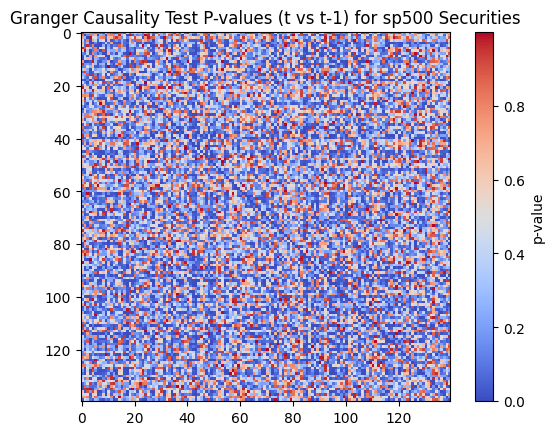

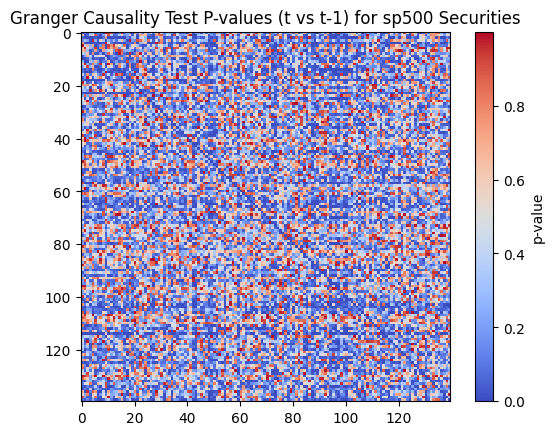

In [ ]:
del plt

import matplotlib.pyplot as plt

for jj in layer0_t_evolution:
  plt.imshow(jj, cmap='coolwarm', interpolation='none')
  plt.colorbar(label='p-value')
  plt.title("Granger Causality Test P-values (t vs t-1) for sp500 Securities")

  # Show the plot
  plt.show()

In [ ]:
# for jjj in rolling_window_on_data(df_sp500_price):
#   # print(jjj.min(), jjj.max())
#   # time.sleep(5)


In [ ]:
layers_p_val = []
# for layer in layers:
#   p_values_matrix = granger_causality_all_pairs(layer, max_lag=1)
#   layers_p_val.append(p_values_matrix)


In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'wb') as f:
#     pickle.dump(layers_p_val, f)

In [ ]:
with open('/content/drive/MyDrive/data_Multilayer spillover with ML/data_layers_p_val.pkl', 'rb') as file:
    layers_p_val = pickle.load(file)

In [ ]:
# # Plotting
# plt.imshow(p_values_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar(label='p-value')
# plt.title("Granger Causality Test P-values (t vs t-1) for NASDAQ-100 Securities")

# # Show the plot
# plt.tight_layout()

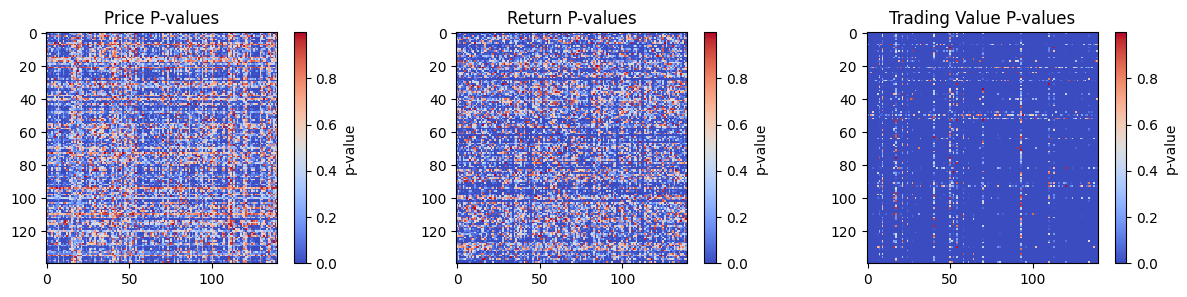

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 3))

axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none')
axs[0].set_title('Price P-values')
fig.colorbar(axs[0].imshow(layers_p_val[0], cmap='coolwarm', interpolation='none'), ax=axs[0], label='p-value')


axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none')
axs[1].set_title('Return P-values')
fig.colorbar(axs[1].imshow(layers_p_val[1], cmap='coolwarm', interpolation='none'), ax=axs[1], label='p-value')


axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none')
axs[2].set_title('Trading Value P-values')
fig.colorbar(axs[2].imshow(layers_p_val[2], cmap='coolwarm', interpolation='none'), ax=axs[2], label='p-value')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

def build_weighted_adjacency_matrix_rf(target_df, feature_df, lag=1, n_estimators=100, random_state=42, n_jobs=-1):
    """
    Build a weighted adjacency matrix using Random Forest feature importances as weights.

    Parameters:
    - target_df: DataFrame of prices (targets)
    - feature_df: DataFrame of volumes (features)
    - lag: How many time steps to shift feature_df
    - n_estimators: Number of trees in the forest
    - random_state: Random seed for reproducibility
    - n_jobs: Number of jobs to run in parallel (use -1 for all cores)

    Returns:
    - weighted_adjacency_df: DataFrame (targets x features), weighted by feature importance
    """
    feature_df_shifted = feature_df.shift(lag)

    # Function to calculate feature importances for each target column
    def compute_feature_importances(target_col):
        df_combined = pd.concat([feature_df_shifted, target_df[target_col]], axis=1).dropna()
        X = df_combined[feature_df.columns]
        y = df_combined[target_col]

        rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
        rf.fit(X, y)
        return pd.Series(rf.feature_importances_, index=X.columns)

    # Set up tqdm with joblib's Parallel to show progress bar
    # The `tqdm` wraps the iterator to display progress for parallel execution
    adjacency_data = Parallel(n_jobs=n_jobs)(
        delayed(compute_feature_importances)(target_col)
        for target_col in tqdm(target_df.columns, desc="Processing target columns")
    )

    # Create weighted adjacency matrix
    weighted_adjacency_df = pd.DataFrame(adjacency_data, index=target_df.columns, columns=feature_df.columns)
    print(weighted_adjacency_df)
    return weighted_adjacency_df


In [ ]:
df_sp500_tradingval.columns = [col + '_tradingval' for col in df_sp500_tradingval.columns]
df_sp500_price.columns = [col + '_price' for col in df_sp500_price.columns]


# result = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns[0:100]], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'wb') as f:
#     pickle.dump(result, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_0_100.pkl', 'rb') as file:
    result = pickle.load(file)

In [ ]:
# df_temp11 = result.to_numpy().flatten()
# print(f"number of connection: {len(df_temp11[df_temp11>0.5])}")

# # Condition: find indices of values greater than 30
# indices = [index for index, value in enumerate(df_temp11) if value > 0.5]

# print(indices)

# plt.hist(df_temp11,bins=100)
# plt.show()

In [ ]:
# result.idxmax(axis=1).drop_duplicates()

In [ ]:
# result['AMZN_tradingval']

In [ ]:
# result_part2 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[0:100]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns[100:]], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'wb') as f:
#     pickle.dump(result_part2, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_0_100_feature_100_last.pkl', 'rb') as file:
    result_part2 = pickle.load(file)



In [ ]:
# result_part2

In [ ]:
# result_part2.idxmax(axis=1)

In [ ]:
# result_part2.idxmax(axis=1).drop_duplicates()

In [ ]:
# result_part3 = build_weighted_adjacency_matrix_rf(df_sp500_price[df_sp500_price.columns[100:]], \
#                                             df_sp500_tradingval[df_sp500_tradingval.columns], \
#                                             lag=1, \
#                                             n_estimators=100, \
#                                             random_state=42)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'wb') as f:
#     pickle.dump(result_part3, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/result_target_100_last_feature_0_last.pkl', 'rb') as file:
    result_part3 = pickle.load(file)

In [ ]:
# result_part3

In [ ]:
# result_part3.idxmax(axis=1).drop_duplicates()

In [ ]:
# result_part3.to_numpy.flatten()

In [ ]:
result_part2.columns
temp111 = pd.concat([result,result_part2],axis=1)

In [ ]:
complete_result = pd.concat([temp111,result_part3], axis=0)

In [ ]:
# with open('/content/drive/MyDrive/data_Multilayer spillover with ML/complete_result_time_0_10.pkl', 'wb') as f:
#     pickle.dump(complete_result, f)

with open('/content/drive/MyDrive/data_Multilayer spillover with ML/complete_result_time_0_10.pkl', 'rb') as file:
    complete_result = pickle.load(file)

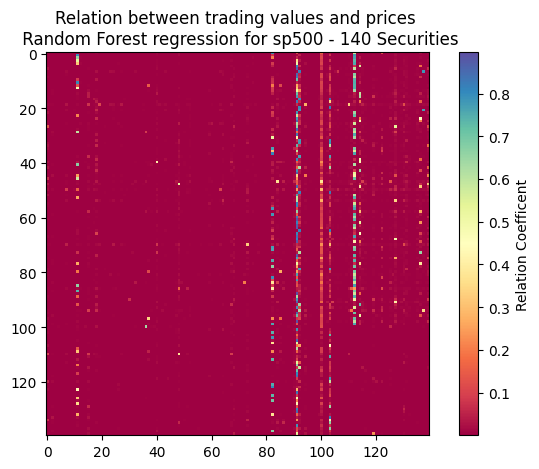

In [ ]:
complete_result
plt.imshow(complete_result, cmap='Spectral', interpolation='none')
plt.colorbar(label='Relation Coefficent')
plt.title("Relation between trading values and prices \n Random Forest regression for sp500 - 140 Securities")

# Show the plot
plt.tight_layout()